2023-02-19 23:11:05.490162: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-19 23:11:06.471107: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib64
2023-02-19 23:11:06.471176: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib64
2023-02-19 23:11:06.471184: W tensorflow/c

Epoch 1/5


2023-02-19 23:11:10.728928: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8700
2023-02-19 23:11:11.601845: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-02-19 23:11:11.603705: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f673e73cc20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-02-19 23:11:11.603720: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA A40, Compute Capability 8.6
2023-02-19 23:11:11.608674: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-02-19 23:11:11.724997: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


938/938 [==============================] - ETA: 0s - loss: 0.1897 - accuracy: 0.9423

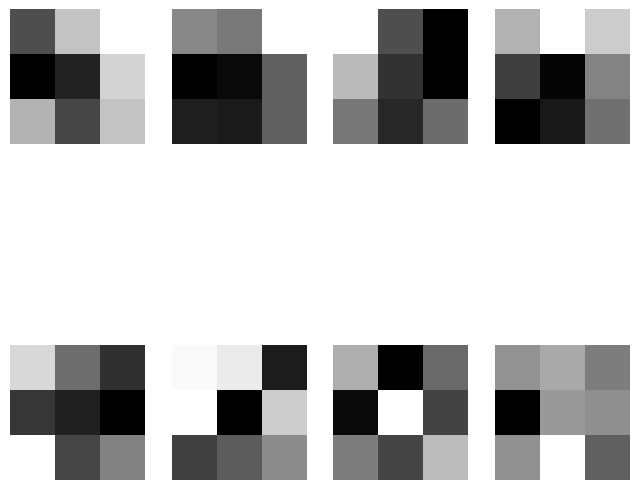

938/938 [==============================] - 6s 3ms/step - loss: 0.1897 - accuracy: 0.9423
Epoch 2/5
925/938 [============================>.] - ETA: 0s - loss: 0.0522 - accuracy: 0.9834

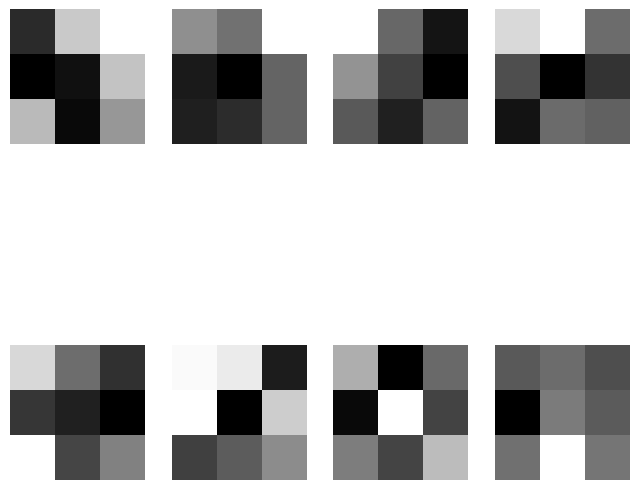

938/938 [==============================] - 3s 3ms/step - loss: 0.0522 - accuracy: 0.9834
Epoch 3/5
933/938 [============================>.] - ETA: 0s - loss: 0.0380 - accuracy: 0.9883

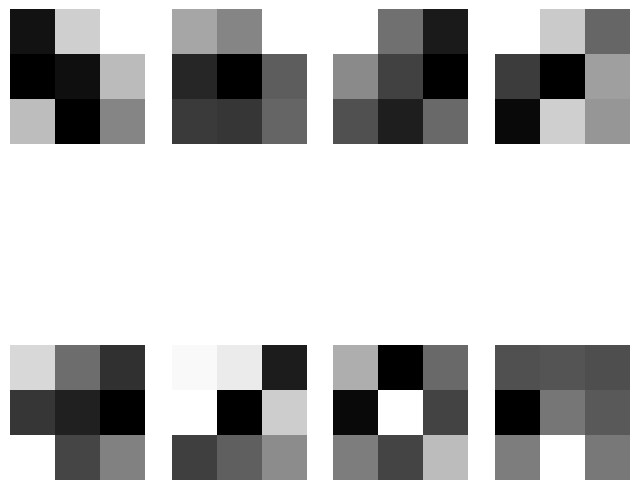

938/938 [==============================] - 3s 3ms/step - loss: 0.0379 - accuracy: 0.9883
Epoch 4/5
928/938 [============================>.] - ETA: 0s - loss: 0.0288 - accuracy: 0.9908

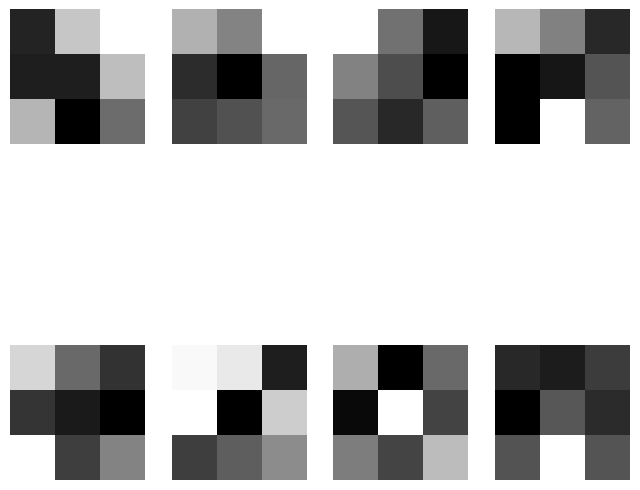

938/938 [==============================] - 3s 3ms/step - loss: 0.0287 - accuracy: 0.9908
Epoch 5/5
934/938 [============================>.] - ETA: 0s - loss: 0.0240 - accuracy: 0.9924

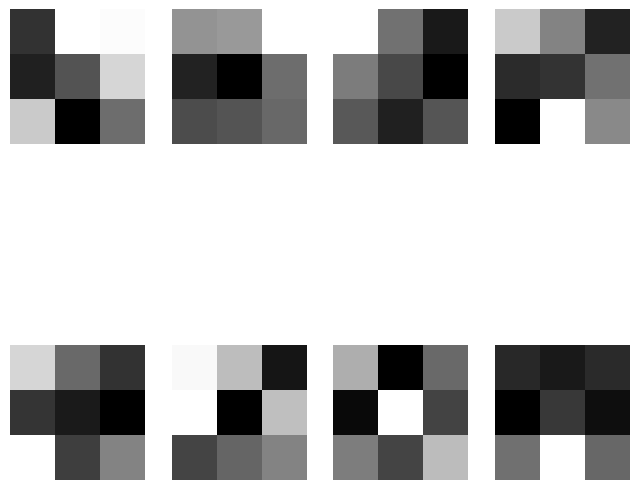

938/938 [==============================] - 3s 3ms/step - loss: 0.0239 - accuracy: 0.9925


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

class FilterVisualizer(tf.keras.callbacks.Callback):
    def __init__(self, layer_name, num_filters=8, figsize=(8, 8)):
        super(FilterVisualizer, self).__init__()
        self.layer_name = layer_name
        self.num_filters = num_filters
        self.figsize = figsize

    def on_epoch_end(self, epoch, logs=None):
        layer = self.model.get_layer(self.layer_name)
        filters, biases = layer.get_weights()

        # Normalize the filter values
        f_min, f_max = filters.min(), filters.max()
        filters = (filters - f_min) / (f_max - f_min)

        # Create the subplot grid
        fig, axs = plt.subplots(self.num_filters // 4, 4, figsize=self.figsize)

        # Plot each filter in a subplot
        for i, ax in enumerate(axs.flat):
            if i < self.num_filters:
                # Extract a single filter
                filter = filters[:, :, :, i]

                # Rescale the filter to have pixel values between 0 and 255
                filter = 255.0 * (filter - filter.min()) / (filter.max() - filter.min())

                # Extract the middle channel of the filter
                channel = filter[:, :, filter.shape[-1] // 2]

                # Plot the filter as an image
                ax.imshow(channel, cmap='gray')
                ax.axis('off')

        # Display the subplot grid
        plt.show()

# Define your model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Define your data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape((60000, 28, 28, 1))
x_train = x_train.astype('float32') / 255.0
y_train = y_train.astype('float32')

# Define your callbacks
visualizer_callback = FilterVisualizer(layer_name='conv2d_2', num_filters=8, figsize=(8, 8))

# Train the model with the callback
history = model.fit(x_train, y_train, epochs=5, batch_size=64, callbacks=[visualizer_callback])
